<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Декомпозиция-проекта" data-toc-modified-id="Декомпозиция-проекта-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Декомпозиция проекта</a></span></li><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Материалы" data-toc-modified-id="Материалы-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Материалы</a></span></li></ul></li><li><span><a href="#Шаг-1.-Загрузка-и-предобработка-данных" data-toc-modified-id="Шаг-1.-Загрузка-и-предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 1. Загрузка и предобработка данных</a></span></li><li><span><a href="#Шаг-2.-Проведение-исследовательского-анализа-данных" data-toc-modified-id="Шаг-2.-Проведение-исследовательского-анализа-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг 2. Проведение исследовательского анализа данных</a></span></li><li><span><a href="#Шаг-3.-Сегментация-клиентов-на-основе-истории-их-покупок" data-toc-modified-id="Шаг-3.-Сегментация-клиентов-на-основе-истории-их-покупок-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг 3. Сегментация клиентов на основе истории их покупок</a></span></li><li><span><a href="#Шаг-4.-Проверка-статистических-гипотез" data-toc-modified-id="Шаг-4.-Проверка-статистических-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг 4. Проверка статистических гипотез</a></span></li><li><span><a href="#Шаг-5.-Выводы-и-рекомендации" data-toc-modified-id="Шаг-5.-Выводы-и-рекомендации-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Шаг 5. Выводы и рекомендации</a></span></li></ul></div>

# Выявление профилей потребления

### Декомпозиция проекта

**Шаг 1. Загрузка и предобработка данных**
- импорт библиотек
- загрузка файла
- знакомство с данными, просмотр общей информации, статистики
- проверка на пропуски, дубликаты
- преобразование типов данных

**Шаг 2. Проведение исследовательского анализа данных**
- добавление нового столбца с полной стоимостью
- динамика заказов и выручки по месяцам
- просмотр заказов в разрезе каждого клиента
- построим распределение по количеству наименований в заказе
- построим график по стоимости заказов
- выведем количество заказов в разрезе покупателей и построим график
- найдем средний чек по каждому покупателю и построим распределение по среднему чеку
- найдем выбросы и отфильтруем их

**Шаг 3. Сегментация клиентов на основе истории их покупок**
- категоризация по полю product
- выручка по категориям
- продажи по месяцам в разрезе каждой категории
- сегментация покупателей с помощью кластеризации по количеству заказов, среденему чеку и среднему количеству товаров в заказе, описание и оценка сегментов
- сегментация по продукту в выделенных ранее сегментах

**Шаг 4. Проверка статистических гипотез**
- средний чек в сегментах отличается
- выручка в категории "хозтовары" отличается от выручки в категории "хранение и порядок"

**Шаг 5. Выводы и рекомендации**

### Описание проекта

Интернет-магазин товаров для дома «Пока все ещё тут»  разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.  Необходимо провести анализ, сегментировать покупателей на основе истории их покупок и разработать персонализированные предложения для клиентов.

**ЦЕЛЬ ИССЛЕДОВАНИЯ:**
- выявление профилей покупателей;
- полноценный анализ товарного ассортимента;
- разработка персонализированных предложений для клиентов.

### Описание данных

Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».

Колонки в  *ecommerce_dataset.csv* :

- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

### Материалы

* Презентация (https://disk.yandex.ru/i/7eJyGVr_HgtOHw)
* Дашборд (https://public.tableau.com/app/profile/anna2919/viz/Dash_ecom/Dashboardecom01?publish=yes)

## Шаг 1. Загрузка и предобработка данных

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
pd.set_option('display.max_colwidth', 130)
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from pymystem3 import Mystem
from collections import Counter
from scipy import stats as st
from plotly import graph_objects as go

In [2]:
# прочитаем датасет и посмотрим на 5 первых строк
df = pd.read_csv('https://code.s3.yandex.net/datasets/ecommerce_dataset.csv')
df.head()

date                           customer_id  order_id  \
0  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   

                                              product  quantity  price  
0     Комнатное растение в горшке Алое Вера, d12, h30         1  142.0  
1  Комнатное растение в горшке Кофе Арабика, d12, h25         1  194.0  
2                         Радермахера d-12 см h-20 см         1  112.0  
3                    Хризолидокарпус Лутесценс d-9 см         1  179.0  
4                      Циперус Зумула d-12 см h-25 см         1  112.0

In [3]:
# посмотрим общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


У нас имеется 6737 записей по покупкам в интернет-магазине и 6 полей. Пропусков не наблюдается. Типы данных соответствуют, кроме поля `date`.

In [4]:
# проверим данные на пропуски 
df.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

In [5]:
# посмотрим статистику
df.describe()

date      order_id     quantity         price
count  6.737000e+03   6737.000000  6737.000000   6737.000000
mean   2.018855e+09  43128.948345     2.501559    462.028499
std    3.855185e+05  27899.414662    15.266478    871.296064
min    2.018100e+09  12624.000000     1.000000      9.000000
25%    2.019020e+09  14827.000000     1.000000    101.000000
50%    2.019050e+09  68503.000000     1.000000    135.000000
75%    2.019061e+09  70504.000000     1.000000    398.000000
max    2.019103e+09  73164.000000  1000.000000  14917.000000

In [6]:
# проверим на дубликаты
df.duplicated().sum()

0

Поменяем тип данных для поля `date`.

In [7]:
df['new_date'] = pd.to_datetime(df['date'], format='%Y%m%d%H')

In [8]:
df['new_date'].head(10)

0   2018-10-01 00:00:00
1   2018-10-01 00:00:00
2   2018-10-01 00:00:00
3   2018-10-01 00:00:00
4   2018-10-01 00:00:00
5   2018-10-01 00:00:00
6   2018-10-01 00:00:00
7   2018-10-01 08:00:00
8   2018-10-01 08:00:00
9   2018-10-01 09:00:00
Name: new_date, dtype: datetime64[ns]

In [9]:
df['date'] = df['new_date']
df = df.drop(columns=['new_date'])

Обработанный датасет конвертируем в .csv файл для будущего построения дашборда.

In [10]:
df.to_csv('df_orders.csv', index=False)

**Вывод**

На этапе загрузки и предобработки файлов ознакомились с данными, проверили на пропуски и дубликаты, поменяли тип данных, где это было необходимо.

## Шаг 2. Проведение исследовательского анализа данных

Добавим в датасет столбец, где подсчитаем полную стоимость по каждой позиции заказа с учетом количества товара.

In [11]:
# добавление нового столбца
df['total_amt'] = df['quantity']*df['price']
df.head()

date                           customer_id  order_id  \
0 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   

                                              product  quantity  price  \
0     Комнатное растение в горшке Алое Вера, d12, h30         1  142.0   
1  Комнатное растение в горшке Кофе Арабика, d12, h25         1  194.0   
2                         Радермахера d-12 см h-20 см         1  112.0   
3                    Хризолидокарпус Лутесценс d-9 см         1  179.0   
4                      Циперус Зумула d-12 см h-25 см         1  112.0   

   total_amt  
0      142.0  
1      194.0  
2      112.0  
3      179.0  
4      112.0

Посмотрим на динамику заказов и выручки по месяцам.

In [12]:
# добавим новое поле с месяцем
df['month'] = df['date'].astype('datetime64[M]')
df['month'].head()

0   2018-10-01
1   2018-10-01
2   2018-10-01
3   2018-10-01
4   2018-10-01
Name: month, dtype: datetime64[ns]

In [13]:
df_date_order = df.groupby(['month']).agg({'order_id':'nunique',  'customer_id': 'nunique', 'total_amt': 'sum'}).reset_index()

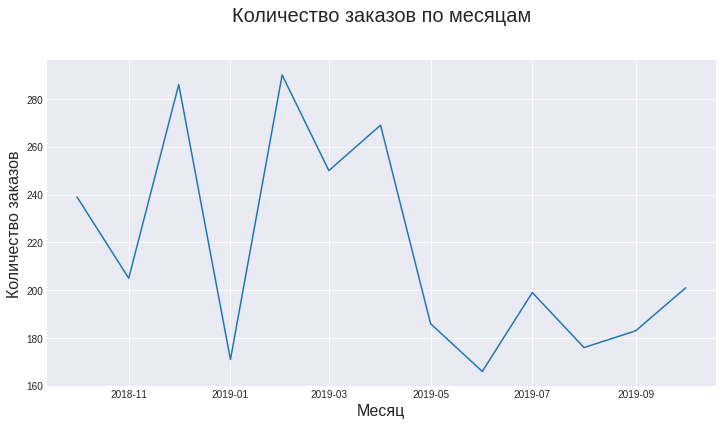

In [14]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,6))
plt.title('Количество заказов по месяцам', y=1.1, fontsize=20)
plt.ylabel('Количество заказов', fontsize=16)
plt.xlabel('Месяц', fontsize=16)
sns.lineplot(x='month', y='order_id', data=df_date_order);

На графике отметим спад продаж в январе, июне-сентябре, в принципе это ожидаемо, с учетом праздников и отпусков.

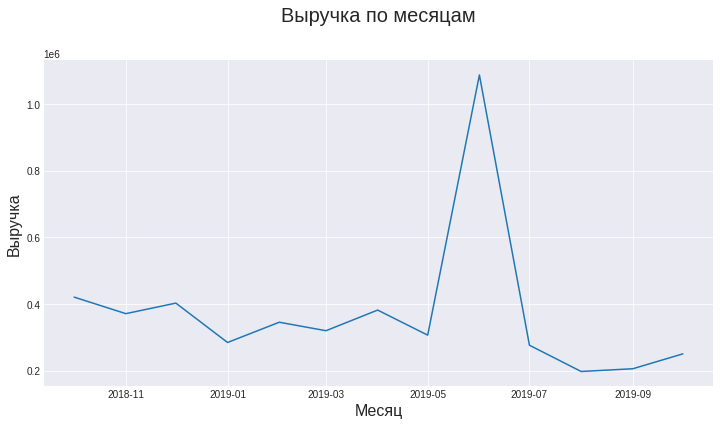

In [15]:
plt.figure(figsize=(12,6))
plt.title('Выручка по месяцам', y=1.1, fontsize=20)
plt.ylabel('Выручка', fontsize=16)
plt.xlabel('Месяц', fontsize=16)
sns.lineplot(x='month', y='total_amt', data=df_date_order);

На этом графике выручка в июне достигает пикового значения, скорее всего это связано с выбросами.

Посчитаем сколько всего клиентов и сколько заказов они оформили. 

In [16]:
print(f'Всего покупателей {df["customer_id"].nunique()}')
print(f'Оформлено заказов {df["order_id"].nunique()}')

Всего покупателей 2451
Оформлено заказов 2784


Посмотрим на заказы клиентов в разрезе каждого клиента.

In [17]:
df_orders = df.groupby(['customer_id','order_id']).agg({'quantity': 'sum', 'total_amt': 'sum'}).sort_values(by='total_amt', ascending=False).reset_index()
df_orders.head(10)

customer_id  order_id  quantity  total_amt
0  312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6     71743      1000   675000.0
1  1d6c8c1f-a799-4418-9af2-1ded47d7a85c     14833       900   114750.0
2  57cc80a2-2610-4eef-9457-e7c3bf0c72f0     70960        60    65220.0
3  9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f     68760        96    50770.0
4  146cd9bf-a95c-4afb-915b-5f6684b17444     71668       334    49432.0
5  58a4c3cc-504f-43ea-a74a-bae19e665552     69830        27    47385.0
6  8fba3604-ef57-4b9f-b2fe-3402fa8825c8     69156       101    33680.0
7  6987e6d6-a63a-4ce2-a2d0-f424092d235e     69504        57    32718.0
8  ae6940d3-a1c7-4997-8853-a5b8afc60d51     71148        18    32382.0
9  e382d4c4-a4c9-44d3-97a0-a8868e122563     69531         7    28973.0

In [18]:
df_orders[['quantity', 'total_amt']].median()

quantity       1.0
total_amt    727.0
dtype: float64

Среднее количество позиций в заказе - 1 шт., и стоимость заказа в среднем 727 руб.

Построим графики распределения количества наименований в заказе и стоимости заказов.

In [19]:
def graph(df, col, text, label, n):
    '''функция строит распределение, точечный график и диаграмму
    размаха для выбранного параметра'''
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(text, y=1.1, fontsize=18)
    
    ax1.set_title('Распределение по признаку', y=1.1, fontsize=15)
    ax1.set_ylabel('Количество значений', fontsize=14)
    ax1.set_xlabel(text,fontsize=14)
    df[col].hist(bins=10, range=(0, n), ax=ax1)
    
    ax2.set_title('Точечный гафик', y=1.1, fontsize=15)
    ax2.set_ylabel(text, fontsize=14)
    ax2.set_xlabel(label, fontsize=14)
    x_values = pd.Series(range(0,len(df)))
    ax2.scatter(x_values, df[col])

    ax3.set_title('Диаграмма размаха', y=1.1, fontsize=15)
    ax3.set_ylabel(text, fontsize=14)
    ax3.set_ylim(0, n)
    ax3.boxplot(df[col]);

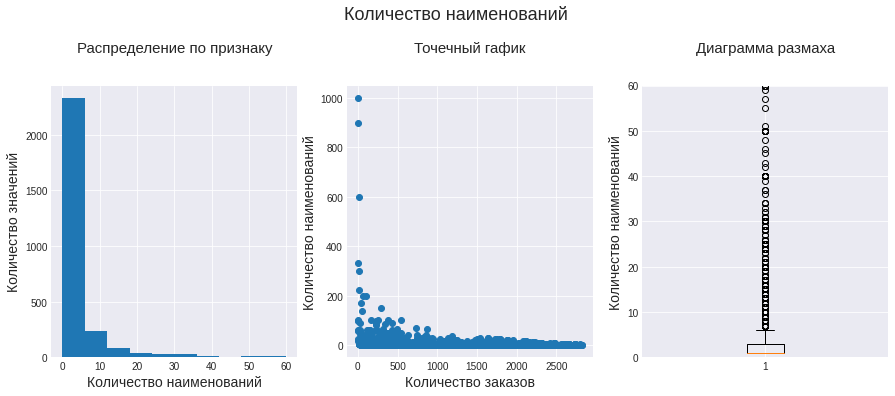

In [20]:
graph(df_orders, 'quantity', 'Количество наименований', 'Количество заказов', 60)

Отметим, что в среднем в заказах только одна товарная позиция, но есть и заказы с большим количеством наименований, например аномальные значения в 1000 и 600 шт. Посчитаем 95 и 99 перцентили для количества позиций в заказе.

In [21]:
np.percentile(df_orders['quantity'], [95, 99])

array([21., 60.])

Не более 5% заказывают больше, чем 21 наименование в заказе и не больше 1 % - более 60 наименований.

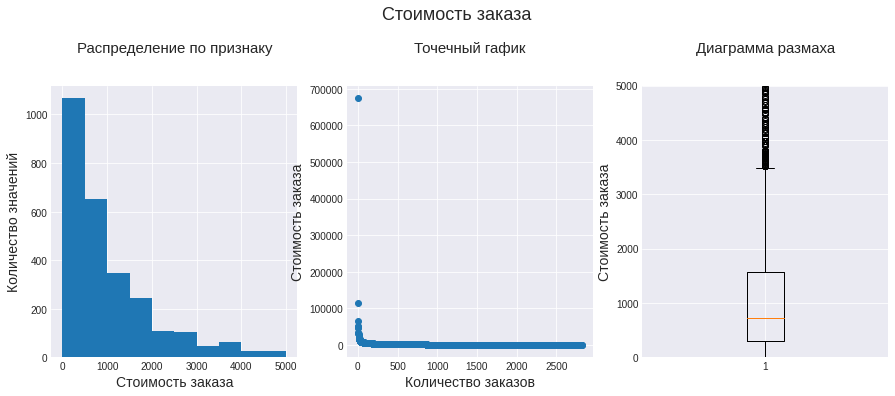

In [22]:
graph(df_orders, 'total_amt', 'Стоимость заказа', 'Количество заказов', 5000)

В основном преобладают очень "маленькие" по стоимости заказы, до 1000 руб., но есть и выбивающиеся значения. Выделяются заказы больше 100 000 и 600 000 руб. Посмотрим на перцентили.

In [23]:
np.percentile(df_orders['total_amt'], [95, 99])

array([ 4796., 11376.])

Не более 1% покупателей заказывают на сумму больше 11 376 руб.

Выведем количество заказов в разрезе покупателей.

In [24]:
df_customer = df.groupby('customer_id').agg({'order_id': 'nunique', 'quantity': 'sum', 'total_amt': 'sum'}).sort_values(by='order_id', ascending=False).reset_index()
df_customer.head()

customer_id  order_id  quantity  total_amt
0  c971fb21-d54c-4134-938f-16b62ee86d3b       126       344   166988.0
1  4d93d3f6-8b24-403b-a74b-f5173e40d7db        35       409    60828.0
2  73d1cd35-5e5f-4629-8cf2-3fda829d4e58        17        18    21713.0
3  b7b865ab-0735-407f-8d0c-31f74d2806cc         7        68     3779.0
4  0184f535-b60a-4914-a982-231e3f615206         5        75     7707.0

In [25]:
df_customer.median()

order_id       1.0
quantity       1.0
total_amt    741.0
dtype: float64

В среднем клиенты делают всего 1 заказ.

Построим распределение по количеству заказов.

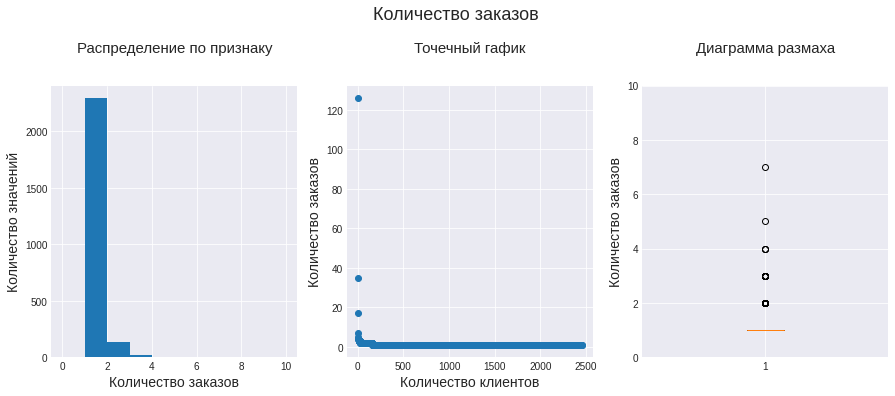

In [26]:
graph(df_customer, 'order_id', 'Количество заказов', 'Количество клиентов', 10)

Большинство пользователей делают всего лишь один заказ. Есть выбросы в 126, 35 и 17 заказов. Посчитаем перцентили.

In [27]:
np.percentile(df_customer['order_id'], [95, 99])

array([2., 3.])

Не более 5% клиентов делают больше 2 заказов и не более 1% - больше 3.

In [28]:
# посчитаем сколько пользователей совершают определенное количество заказов
df_customer['order_id'].value_counts().sort_values()

126       1
5         1
7         1
17        1
35        1
4         3
3        20
2       132
1      2291
Name: order_id, dtype: int64

В интернет-магазине большинство покупателей делают всего один заказ и чаще всего заказывают один товар, с ними надо активно работать для увеличения количества покупок.

Посчитаем средний чек по каждому клиенту и среднее количество товара в заказе.

In [29]:
# добавим новые поля avg_bill и avg_qnt
df_customer['avg_bill'] = df_customer['total_amt'] / df_customer['order_id']
df_customer['avg_qnt'] = df_customer['quantity'] / df_customer['order_id']
df_customer.sort_values(by='avg_bill', ascending=False).head()

customer_id  order_id  quantity  total_amt  \
1416  312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6         1      1000   675000.0   
1781  1d6c8c1f-a799-4418-9af2-1ded47d7a85c         1       900   114750.0   
2441  57cc80a2-2610-4eef-9457-e7c3bf0c72f0         1        60    65220.0   
558   9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f         1        96    50770.0   
1844  146cd9bf-a95c-4afb-915b-5f6684b17444         1       334    49432.0   

      avg_bill  avg_qnt  
1416  675000.0   1000.0  
1781  114750.0    900.0  
2441   65220.0     60.0  
558    50770.0     96.0  
1844   49432.0    334.0

In [30]:
df_customer[['avg_bill', 'avg_qnt']].median()

avg_bill    727.0
avg_qnt       1.0
dtype: float64

Построим графики для среднего чека и среднего количества.

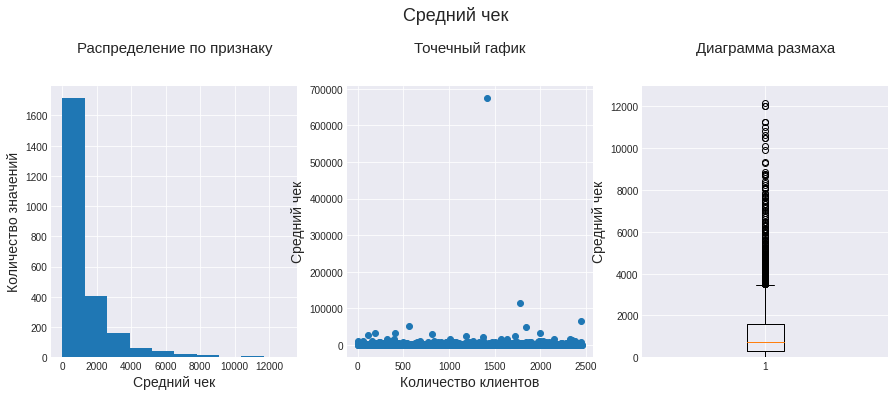

In [31]:
graph(df_customer, 'avg_bill', 'Средний чек', 'Количество клиентов', 13000)

Средний чек у нас меньше 1000 руб. Посчитаем перцентили.

In [32]:
np.percentile(df_customer['avg_bill'], [95, 99])

array([ 4863., 11247.])

Результат практически аналогичен с суммой заказа.

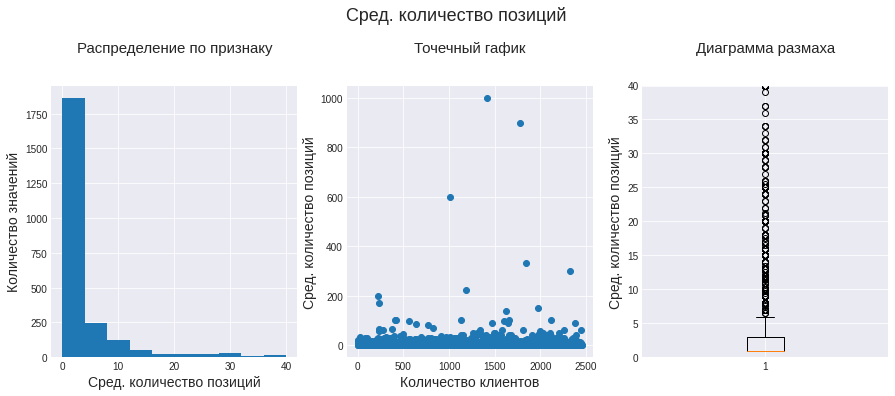

In [33]:
graph(df_customer, 'avg_qnt', 'Сред. количество позиций', 'Количество клиентов', 40)

In [34]:
np.percentile(df_customer['avg_qnt'], [95, 99])

array([21.125, 64.   ])

Отбросим все выбросы по количеству заказов, среднему чеку и среднему количеству наименований в заказе.

In [35]:
df_new = df_customer.query('avg_bill <= 10000 and quantity <= 60 and order_id <= 5').copy()
df_new.head()

customer_id  order_id  quantity  total_amt  \
5   bea7a833-2074-42db-bc49-4457abd3c930         4        30     4409.0   
6   e0535076-6270-4df2-8621-cb06264a94fa         4         4      636.0   
8   7d0641a6-e043-487d-b356-38895fe7df84         3         3      522.0   
9   f163e581-59ba-4022-99db-e0973c7497c0         3         3     2511.0   
10  552e17df-ba16-4e66-84fb-55a5557a6bea         3        31     5398.0   

       avg_bill    avg_qnt  
5   1102.250000   7.500000  
6    159.000000   1.000000  
8    174.000000   1.000000  
9    837.000000   1.000000  
10  1799.333333  10.333333

In [36]:
df_new.columns = ['customer_id', 'order_count', 'qnt_total', 'total_amt', 'avg_bill', 'avg_qnt']

In [37]:
len(df_new)/len(df_customer)*100

97.75601795185639

Отбросили чуть больше 2% пользователей. Это вполне допустимо.

Создадим список клиентов, которых мы отфильтровали.

In [38]:
customers = df_customer.query('avg_bill > 10000 or quantity > 60 or order_id > 5')['customer_id']
customers.count()

55

Выведем список клиентов, у которых 1 заказ и только 1 наименование товара.

In [39]:
df_one = df_customer.query('order_id == 1 and quantity == 1').reset_index()
print(f'Количество клиентов с 1 заказом и 1 наименованием в заказе - {len(df_one)}')

Количество клиентов с 1 заказом и 1 наименованием в заказе - 1353


Это почти больше половины клиентов.

**Вывод**

По итогам исследовательского анализа данных выяснили, что у нас имеются данные по 2451 покупателю, совершившим 2784 заказов. Среднее число заказов на клиента - 1, средняя сумма заказа - 727 руб., среднее количество наименований в заказе - 1 шт. В датасете имеются выбросы, которые мы отфильтровали.

## Шаг 3. Сегментация клиентов на основе истории их покупок

Изучим ассортимент товаров и сопоставим каждому товару подходящую товарную категорию.

In [40]:
# найдем наиболее часто встречаемые слова в столбце 'product' с помощью лемматизации
m = Mystem()
lemmas = m.lemmatize(' '.join(df['product'].unique()))
# посчитаем число упоминаний каждого элемента в тексте
Counter(lemmas)

Counter({'комнатный': 26,
         ' ': 17698,
         'растение': 31,
         'в': 274,
         'горшок': 130,
         'алый': 3,
         'вера': 2,
         ', ': 1068,
         'd12': 3,
         'h30': 6,
         'кофе': 6,
         'арабика': 5,
         'h25': 1,
         'радермахер': 1,
         'd': 252,
         '-': 980,
         '12': 148,
         'см': 1063,
         'h': 61,
         '20': 73,
         'хризолидокарпус': 1,
         'лутесценс': 1,
         '9': 123,
         'циперус': 1,
         'зумула': 1,
         '25': 44,
         'шеффлер': 2,
         'лузеан': 1,
         'юкка': 1,
         'нитчатый': 1,
         '35': 8,
         'настенный': 30,
         'сушилка': 120,
         'для': 547,
         'белье': 144,
         'Gimi': 61,
         'Brio': 4,
         'Super': 7,
         '100': 58,
         'таз': 35,
         'пластмассовый': 59,
         '21': 20,
         ',': 295,
         '0': 164,
         'л': 253,
         'круглый': 23,
         

In [41]:
# создадим словарь с категориями продуктов в качестве ключей и наиболее часто упоминаемыми словами в качестве значений
cat_dict = {'посуда':['Luminarc', 'крышка', 'тарелка', 'нож', 'салатник', 'сковорода', 'миска', 'вилка',
                      'ложка', 'чайник', 'стакан', 'кастрюля', 'термокружок', 'термостакан', 'скалка',
                      'блюдо', 'банка', 'бидон', 'соковыжималка', 'хлебница', 'терка', 'овощеварка',
                      'термос', 'емкость', 'миксер', 'тортница', 'ковш', 'сахарница', 'просеиватель',
                      'столовый', 'шприц', 'половник', 'весы', 'Attribute', 'кипятильник', 'толкушка',
                      'противень', 'алюминиевый', 'ножеточка', 'WEBBER', 'косточка', 'рыбочистка',
                      'кружка', 'выпечка', 'посуда', 'овощечистка'],
            'хозтовары':['коврик', 'сушилка', 'таз', 'чехол', 'хозяйственный', 'щетка', 'доска',
                         'шпингалет', 'ерш', 'швабра', 'ведро', 'урна', 'дозатор', 'прищепка',
                          'перчатка', 'стремянка', 'термометр', 'корыто', 'салфетка', 'штанга',
                         'подрукавник', 'сидение', 'вантуз', 'совок', 'мыло', 'паста', 'тряпкодержатель',
                         'веник', 'мытье', 'бензин', 'соль', 'засор', 'окномойка',  'плечики', 
                         'электроштопор', 'тряпка', 'электрический', 'крем', 'ткань', 'светильник',
                         'батарейка', 'пена', 'решетка', 'уголок', 'ручка', 'отбеливатель', 'шпагат',
                         'ванна', 'подголовник', 'линейка', 'насадка', 'штангенциркуль', 'фиксатор',
                        'ополаскиватель', 'мл', 'фал', 'сетка', 'длина', 'фен', 'ролик', 'комплект',
                        'держатель', 'утюг'],
            'инструменты': ['крепеж', 'петля', 'заметка','стяжка', 'завертка', 'сварка', 'пружина',
                            'инструмент', 'скребок', 'нитрид'],
            'текстиль': ['штора', 'скатерть', 'хлопок', 'белье', 'полотенце', 'плед', 'ковер', 'подушка',
                         'одеяло', 'пакет', 'подставка', 'покрывало', 'халат'],
            'комнатные растения': ['горшок', 'пеларгония', 'кашпо', 'растение', 'комнатный', 'd', 'диам',
                                   'пеларгония', 'объем', 'вербейник', 'калла', 'цвет'],
            'хранение и порядок': ['вешалка', 'сумка', 'тележка', 'корзина', 'крючок', 'полка',
                                   'контейнер', 'карниз', 'кофр', 'комод', 'коробка', 'стеллаж',
                                   'ящик', 'мешок', 'лоток', 'Hausmann', 'этажерка', 'ключница'],
            'декор': ['муляж', 'цветок', 'лиана', 'фоторамка', 'фиалка'],
            'дача': ['рассада', 'дыня', 'арбуз', 'огурец', 'сельдерей', 'томат', 'клубника', 'шт',
                     'штука', 'базилик', 'виноград', 'укроп', 'капуста', 'салат', 'петрушка', 'г',
                    'осина', 'ель']}

# напишем функцию, которая трансформирует этот словарь в новый словарь, где каждое слово является ключом, а категория - значением
def transform_dict(cat_dict):
    new_cat_dict = {}
    for cat, words in cat_dict.items():
        for word in words:
            new_cat_dict[word] = cat
    return new_cat_dict

new_cat_dict = transform_dict(cat_dict) # применим функцию к нашему исходному словарю и сохраним в новую переменную

In [42]:
# создадим функцию
def product_category(row):
    '''функция, которая будет лемматизировать каждую ячейку в столбце product и проверять, 
    к какой категории продуктов ее отнести'''
    lemma = m.lemmatize(row)
    for word in lemma:
        if word in new_cat_dict:
            return new_cat_dict[word]
    return 'другое'

In [43]:
# применим функцию к столбцу 'product' для создания нового столбца 'product_category'
df['product_category'] = df['product'].apply(product_category) 
df.head()

date                           customer_id  order_id  \
0 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   

                                              product  quantity  price  \
0     Комнатное растение в горшке Алое Вера, d12, h30         1  142.0   
1  Комнатное растение в горшке Кофе Арабика, d12, h25         1  194.0   
2                         Радермахера d-12 см h-20 см         1  112.0   
3                    Хризолидокарпус Лутесценс d-9 см         1  179.0   
4                      Циперус Зумула d-12 см h-25 см         1  112.0   

   total_amt      month    product_category  
0      142.0 2018-10-01  комнатные растения  
1      194.0 2018-10-01  комнатные растения  
2      112.0 2018-10-01  комнатные растения  
3      179.0 2018-10-01  комнатные растения  
4      112.0 2018-10-01  комнатные растения

In [44]:
df[df['product_category'] =='другое'].sort_values(by='quantity')

Empty DataFrame
Columns: [date, customer_id, order_id, product, quantity, price, total_amt, month, product_category]
Index: []

Посмотрим на распределение продаж по категориям.

In [45]:
df_cat = df.groupby('product_category')['total_amt'].sum().reset_index().sort_values(by='total_amt', ascending=False)
df_cat

product_category  total_amt
6           хозтовары  2084041.0
7  хранение и порядок  1241025.0
3  комнатные растения   451086.0
5            текстиль   332751.0
0                дача   288388.0
4              посуда   285145.0
1               декор   132723.0
2         инструменты    36121.0

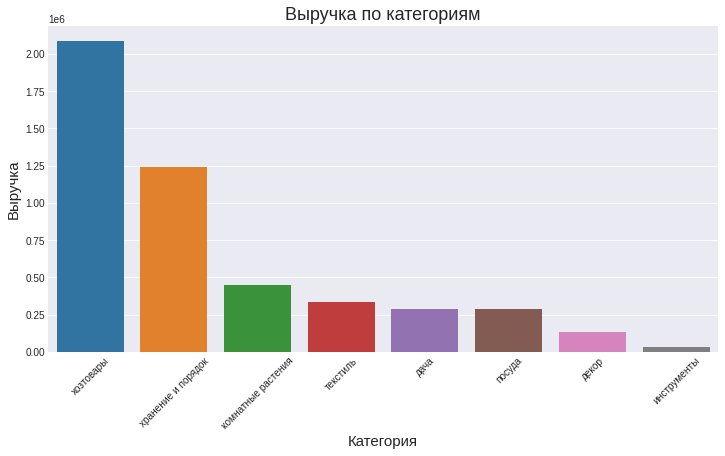

In [46]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
ax = sns.barplot(x='product_category', y='total_amt', data=df_cat)
ax.set_title('Выручка по категориям', y=1, fontsize=18)
ax.set_xlabel('Категория', fontsize=15)
ax.set_ylabel('Выручка', fontsize=15);

Больше всего выручка в категориях "Хозтовары" и "Хранение и порядок".

Посмотрим на продажи по месяцам в разрезе каждой категории.

In [47]:
df_month_cat = df.groupby(['customer_id','product_category', 'month']).agg({'quantity': 'sum', 'total_amt': 'sum'}).reset_index().sort_values(by='quantity', ascending=False)
df_month_cat.head()

customer_id    product_category      month  \
503   312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6           хозтовары 2019-06-01   
307   1d6c8c1f-a799-4418-9af2-1ded47d7a85c                дача 2019-06-01   
2155  cd09ea73-d9ce-48c3-b4c5-018113735e80         инструменты 2018-10-01   
214   146cd9bf-a95c-4afb-915b-5f6684b17444  хранение и порядок 2019-06-01   
950   5d189e88-d4d6-4eac-ab43-fa65a3c4d106               декор 2019-05-01   

      quantity  total_amt  
503       1000   675000.0  
307        876   111690.0  
2155       600    17100.0  
214        334    49432.0  
950        300    15300.0

In [48]:
# отфильтруем клиентов с выбросами
df_month_cat = df_month_cat.query('customer_id not in @customers').groupby(['product_category', 'month']).agg({'total_amt':'sum'}).reset_index()

In [49]:
# список категорий
list_col=['посуда', 'хозтовары', 'инструменты', 'текстиль', 'хранение и порядок', 'комнатные растения', 'дача', 'декор']

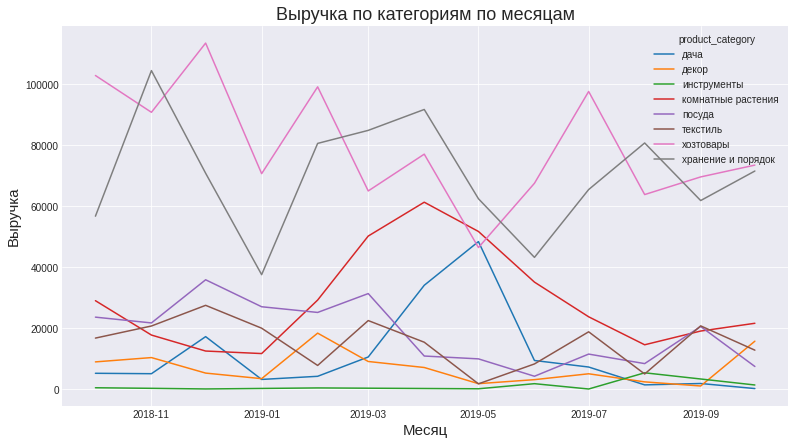

In [50]:
plt.figure(figsize=(13, 7))
ax = sns.lineplot(x='month', y='total_amt', hue='product_category', data=df_month_cat)
ax.set_title('Выручка по категориям по месяцам', y=1, fontsize=18)
ax.set_xlabel('Месяц', fontsize=15)
ax.set_ylabel('Выручка', fontsize=15);

Отметим, что продажа в некоторых категориях носит сезонный характер. Так, например:
- пик продаж для категории "комнатные растения" в апреле
- пик продаж для категории "дача" в мае
- категории "хозтовары" и "хранение и порядок" всегда востребованы, продажи по ним проседают в январе и июне
- "посуда" популярна в декабре и марте - время праздников

Проведем кластеризацию клиентов по количеству заказов, среднему чеку и среднему числу наименований в заказе. Построим матрицу корреляций для таблицы `df_new`

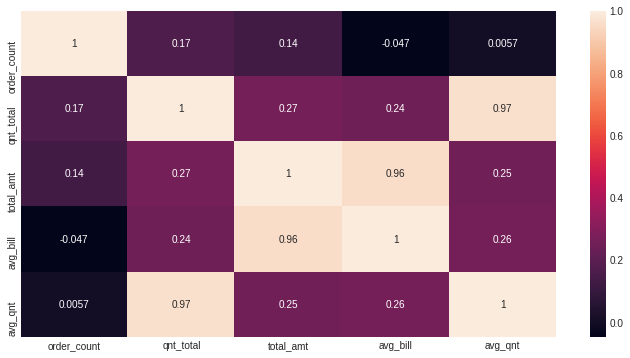

In [51]:
cm = df_new.corr()
plt.figure(figsize = (12,6))
#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot=True);

По матрице видим, что у нас коррелируют попарно признаки `total_amt` , `avg_bill` и `qnt_total`, `avg_quantity`, поэтому оставим в конечном датасете только поля `avg_bill` и `avg_qnt`.

Проведем кластеризацию по оставшимся признакам с помощью алгоритма машинного обучения K-Means, но вначале с помощью агломеративной иерархической кластеризации выделим оптимальное количество кластеров.

In [52]:
# стандартизация данных
scaler = StandardScaler()
x_sc= scaler.fit_transform(df_new.drop(columns=['customer_id', 'qnt_total', 'total_amt']))

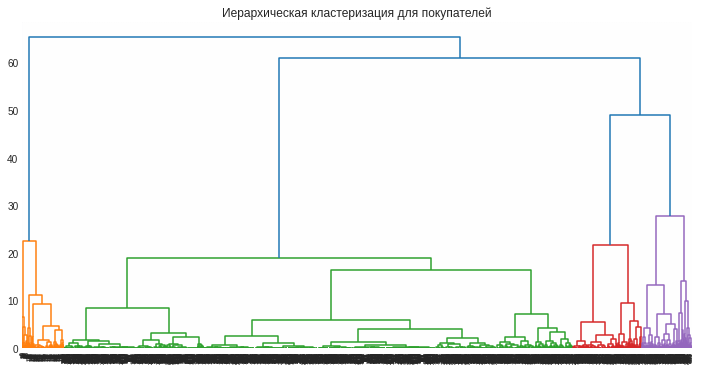

In [53]:
# построим дендрограммы
linked = linkage(x_sc, method = 'ward') 
plt.figure(figsize=(12, 6))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация для покупателей')
plt.show() 

Исходя из графика зададим число кластеров - 4.

In [54]:
# задаём число кластеров, равное 4, и фиксируем значение random_state для воспроизводимости результата
km = KMeans(n_clusters=4, random_state=0) 
# применяем алгоритм к данным и формируем вектор кластеров 
labels = km.fit_predict(x_sc) 
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [55]:
# сохраняем метки кластера в поле нашего датасета
df_new['cluster'] = labels

Посмотрим на средние значения признаков для каждого кластера.

In [56]:
df_new.head()

customer_id  order_count  qnt_total  total_amt  \
5   bea7a833-2074-42db-bc49-4457abd3c930            4         30     4409.0   
6   e0535076-6270-4df2-8621-cb06264a94fa            4          4      636.0   
8   7d0641a6-e043-487d-b356-38895fe7df84            3          3      522.0   
9   f163e581-59ba-4022-99db-e0973c7497c0            3          3     2511.0   
10  552e17df-ba16-4e66-84fb-55a5557a6bea            3         31     5398.0   

       avg_bill    avg_qnt  cluster  
5   1102.250000   7.500000        0  
6    159.000000   1.000000        0  
8    174.000000   1.000000        0  
9    837.000000   1.000000        0  
10  1799.333333  10.333333        0

In [57]:
df_new.groupby('cluster').median()

order_count  qnt_total  total_amt  avg_bill  avg_qnt
cluster                                                      
0                  2          3     1155.5     555.5      1.5
1                  1          1      571.0     571.0      1.0
2                  1          1     3705.0    3705.0      1.0
3                  1         29     2240.0    2220.0     29.0

Построим распределения признаков для кластеров

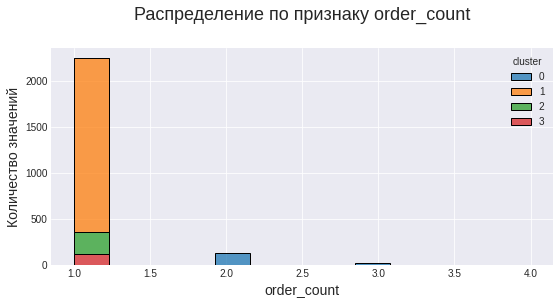

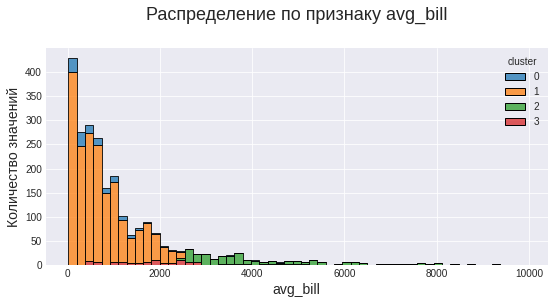

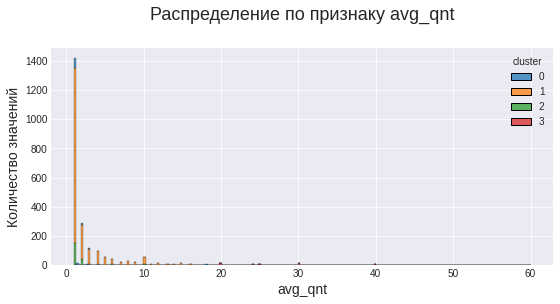

In [58]:
for col in df_new.columns.drop(['cluster', 'customer_id', 'qnt_total', 'total_amt']):
    plt.figure(figsize=(9, 4))
    plt.title(f'Распределение по признаку {col}', y=1.1, fontsize=18)
    ax = sns.histplot(data=df_new, x=col, hue='cluster', palette='tab10', multiple="stack")
    ax.set_xlabel(col, fontsize=14)
    ax.set_ylabel('Количество значений', fontsize=14)
    plt.show()

Из таблицы со средними значениями признаков и графиков выше можно сделать описание каждого сегмента клиентов:
1. В 0 кластере клиенты делают примерно 2 заказа, со средним количеством наименований 1-2 шт., и с небольшим средним чеком.
2. В 1 кластере клиенты делают 1 заказ со средним количеством наименований 1 шт.с довольно небольшим средним чеком.
3. Во 2 кластере клиенты делают в среднем 1 заказ со средним количеством наименований 1 шт., но с высоким средним чеком. 
4. В 3 кластере клиенты делают 1 заказ с большим количеством наименований , около 29 шт., и с большим за счет этого средним  чеком.

Посмотрим на выручку и количество клиентов по кластерам.

In [59]:
fig = go.Figure(data=[go.Pie(labels=df_new['cluster'], values=df_new['total_amt'])])
fig.update_layout(title_text='Выручка по кластерам', title_x=0.5)
fig.show()
df_count = df_new.groupby('cluster').count().reset_index()
fig = go.Figure(data=[go.Pie(labels=df_count['cluster'], values=df_count['customer_id'])])
fig.update_layout(title_text='Число покупателей по кластерам', title_x=0.5)
fig.show()

Самый большой по количеству клиентов - 1 кластер и он приносит больше всего выручки, догоняет его 2 кластер.

Подготовим таблицу с суммой покупок по товарным категориям

In [60]:
df_1 = df.pivot_table(index='customer_id', columns='product_category', values = 'total_amt', aggfunc = 'sum')
df_1.head()

product_category                      дача  декор  инструменты  \
customer_id                                                      
000d6849-084e-4d9f-ac03-37174eaf60c4   NaN    NaN          NaN   
001cee7f-0b29-4716-b202-0042213ab038   NaN    NaN          NaN   
00299f34-5385-4d13-9aea-c80b81658e1b   NaN    NaN          NaN   
002d4d3a-4a59-406b-86ec-c3314357e498   NaN    NaN          NaN   
003bbd39-0000-41ff-b7f9-2ddaec152037   NaN    NaN          NaN   

product_category                      комнатные растения  посуда  текстиль  \
customer_id                                                                  
000d6849-084e-4d9f-ac03-37174eaf60c4               555.0     NaN       NaN   
001cee7f-0b29-4716-b202-0042213ab038                 NaN     NaN       NaN   
00299f34-5385-4d13-9aea-c80b81658e1b                 NaN     NaN       NaN   
002d4d3a-4a59-406b-86ec-c3314357e498                 NaN     NaN       NaN   
003bbd39-0000-41ff-b7f9-2ddaec152037                 NaN     NaN       NaN   

product_category                      хозтовары  хранение и порядок  
customer_id                                                          
000d6849-084e-4d9f-ac03-37174eaf60c4        NaN                 NaN  
001cee7f-0b29-4716-b202-0042213ab038      442.0                 NaN  
00299f34-5385-4d13-9aea-c80b81658e1b      914.0                 NaN  
002d4d3a-4a59-406b-86ec-c3314357e498        NaN              1649.0  
003bbd39-0000-41ff-b7f9-2ddaec152037        NaN              2324.0

Объединим данные этой таблицы с таблицей с выделенными кластерами, а также рассчитаем долю покупок клиентов в каждой категории.

In [61]:
df_1 = df_1.merge(df_new, on='customer_id', how='left')

for col in list_col:
    df_1[col] = df_1[col]/df_1['total_amt']

df_1 = df_1.fillna(0)
df_1.head()

customer_id  дача  декор  инструменты  \
0  000d6849-084e-4d9f-ac03-37174eaf60c4   0.0    0.0          0.0   
1  001cee7f-0b29-4716-b202-0042213ab038   0.0    0.0          0.0   
2  00299f34-5385-4d13-9aea-c80b81658e1b   0.0    0.0          0.0   
3  002d4d3a-4a59-406b-86ec-c3314357e498   0.0    0.0          0.0   
4  003bbd39-0000-41ff-b7f9-2ddaec152037   0.0    0.0          0.0   

   комнатные растения  посуда  текстиль  хозтовары  хранение и порядок  \
0                 1.0     0.0       0.0        0.0                 0.0   
1                 0.0     0.0       0.0        1.0                 0.0   
2                 0.0     0.0       0.0        1.0                 0.0   
3                 0.0     0.0       0.0        0.0                 1.0   
4                 0.0     0.0       0.0        0.0                 1.0   

   order_count  qnt_total  total_amt  avg_bill  avg_qnt  cluster  
0          1.0        4.0      555.0     555.0      4.0      1.0  
1          1.0        1.0      442.0     442.0      1.0      1.0  
2          1.0        2.0      914.0     914.0      2.0      1.0  
3          1.0        1.0     1649.0    1649.0      1.0      1.0  
4          1.0        2.0     2324.0    2324.0      2.0      1.0

Выделим в каждом кластере группы с предпочтениями по товарным категориям.

In [62]:
# создадим поле с приоритетной категорией для каждого клиента
df_1['preferences'] = df_1.drop(columns=['customer_id', 'order_count', 'qnt_total', 'total_amt', 'avg_bill', 'avg_qnt', 'cluster']).idxmax(axis=1)

In [63]:
df_1.head()

customer_id  дача  декор  инструменты  \
0  000d6849-084e-4d9f-ac03-37174eaf60c4   0.0    0.0          0.0   
1  001cee7f-0b29-4716-b202-0042213ab038   0.0    0.0          0.0   
2  00299f34-5385-4d13-9aea-c80b81658e1b   0.0    0.0          0.0   
3  002d4d3a-4a59-406b-86ec-c3314357e498   0.0    0.0          0.0   
4  003bbd39-0000-41ff-b7f9-2ddaec152037   0.0    0.0          0.0   

   комнатные растения  посуда  текстиль  хозтовары  хранение и порядок  \
0                 1.0     0.0       0.0        0.0                 0.0   
1                 0.0     0.0       0.0        1.0                 0.0   
2                 0.0     0.0       0.0        1.0                 0.0   
3                 0.0     0.0       0.0        0.0                 1.0   
4                 0.0     0.0       0.0        0.0                 1.0   

   order_count  qnt_total  total_amt  avg_bill  avg_qnt  cluster  \
0          1.0        4.0      555.0     555.0      4.0      1.0   
1          1.0        1.0      442.0     442.0      1.0      1.0   
2          1.0        2.0      914.0     914.0      2.0      1.0   
3          1.0        1.0     1649.0    1649.0      1.0      1.0   
4          1.0        2.0     2324.0    2324.0      2.0      1.0   

          preferences  
0  комнатные растения  
1           хозтовары  
2           хозтовары  
3  хранение и порядок  
4  хранение и порядок

Построим график с распределением категорий по кластерам.

In [64]:
df_cluster_cat = df_1.groupby(['cluster', 'preferences']).agg({'preferences': 'count'}).rename(columns={'preferences' : 'pref_count'}).reset_index()

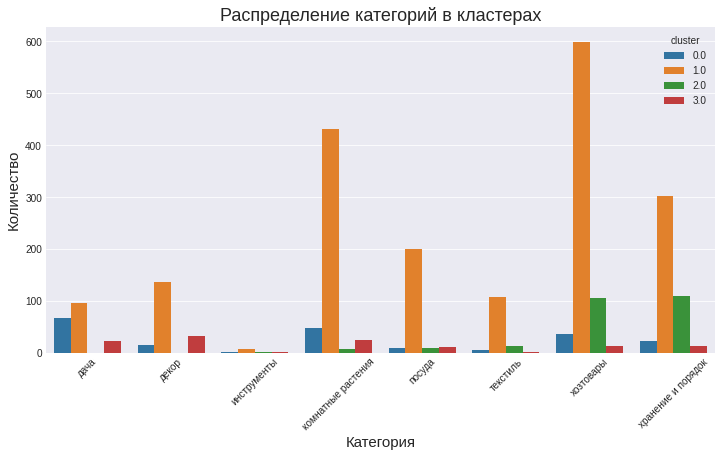

In [65]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
ax = sns.barplot(x='preferences', y='pref_count', data=df_cluster_cat, hue='cluster')
ax.set_title('Распределение категорий в кластерах', y=1, fontsize=18)
ax.set_xlabel('Категория', fontsize=15)
ax.set_ylabel('Количество', fontsize=15);

Из графика можем отметить, что 0 кластер предпочитает комнатные растения и рассаду, 1 кластер - недорогие хозтовары и комнатные растения, 2 кластер - дорогие хозтовары и товары из категории "хранение и порядок", 3 кластер - покупает много дешевых позиций из категорий декор, дача и растения.

Добавим еще одно поле, в котором будет информация по остальным категориям, в которых клиент покупал товар, в порядке убывания по доле от всех покупок.

In [66]:
# напишем функцию
def pref(data):
    '''функция находит категори, где ненулевая доля продаж и
    сохраняет название категории и эту долю в список, сортирует его
    и возвращает категории в порядке убывания доли продаж'''
    max_cat = data['preferences']
    list_pref = []
    for col in list_col:
        if (col != max_cat) and (data[col] != 0):
              list_pref.append([col, data[col]])
    list_pref.sort(reverse=True, key=lambda x:x[1])            
    return str.join(',', [x[0] for x in list_pref])            

In [67]:
df_1['preferences_other'] = df_1.apply(pref, axis=1)

In [68]:
df_1.query('preferences_other != ""').head()

customer_id      дача    декор  инструменты  \
22   01bd5b9a-2b4e-483c-95a3-40b040c392e8  0.558824  0.00000          0.0   
97   0982f6b9-328f-4a67-b7ee-cd0a114868f0  0.000000  0.00000          0.0   
108  0a4e4711-5cb7-4bae-93cf-6731902708de  0.000000  0.00000          0.0   
111  0a8362cf-e2d8-4ffc-8072-33239f5e450a  0.000000  0.21976          0.0   
149  0f47231c-3a68-404a-88f7-08a4a172c17f  0.826355  0.00000          0.0   

     комнатные растения  посуда  текстиль  хозтовары  хранение и порядок  \
22             0.441176     0.0       0.0   0.000000            0.000000   
97             0.000000     0.0       0.0   0.883972            0.116028   
108            0.037968     0.0       0.0   0.962032            0.000000   
111            0.780240     0.0       0.0   0.000000            0.000000   
149            0.173645     0.0       0.0   0.000000            0.000000   

     order_count  qnt_total  total_amt  avg_bill  avg_qnt  cluster  \
22           1.0        8.0      408.0     408.0      8.0      1.0   
97           1.0        3.0     1017.0    1017.0      3.0      1.0   
108          2.0        3.0     3740.0    1870.0      1.5      0.0   
111          1.0        5.0     1083.0    1083.0      5.0      1.0   
149          1.0       14.0      812.0     812.0     14.0      1.0   

            preferences   preferences_other  
22                 дача  комнатные растения  
97            хозтовары  хранение и порядок  
108           хозтовары  комнатные растения  
111  комнатные растения               декор  
149                дача  комнатные растения

**Вывод**

Провели категоризацию продуктов и выделили 8 категорий товаров. Больше всего выручка в категориях "Хозтовары" и "Хранение и порядок". В некоторых категориях продажи носят сезонный характер. Провели кластеризацию клиентов по количеству заказов, среднему чеку и среднему числу наименований в заказе и выделили 4 кластера покупателей. В 1 и 2 кластере клиенты делают в среднем 1 заказ со средним количеством наименований 1 шт., различие только в среднем чеке. В 0 кластере клиенты делают больше 1 заказа, с небольшим средним чеком. В 3 кластере клиенты делают 1 заказ с большим количеством наименований и с большим за счет этого средним чеком. Самый многочисленный 1 кластер и он приносит больше всего выручки. Нашли приоритетные категории для каждого клиента и посмотрели на распределение приоритетных категорий в каждом кластере. 0 кластер предпочитает комнатные растения и рассаду, 1 кластер - недорогие хозтовары и комнатные растения, 2 кластер - дорогие хозтовары и товары из категории "хранение и порядок", 3 кластер - покупает много дешевых позиций из категорий декор, дача и растения.

## Шаг 4. Проверка статистических гипотез

Для начала проверим гипотезу - средний чек в сегментах отличается. Для этого за нулевую гипотезу примем утверждение, что средние чеки в сегментах 0, 1, 2, 3 равны. Альтернативная гипотеза - средние чеки в сегментах 0, 1, 2, 3 различаются. Чтобы проверить гипотезу о равенстве средних двух генеральных совокупностей для независимых выборок, применим метод scipy.stats.ttest_ind().

In [69]:
df_clust_0 = df_1.query('cluster == 0')
df_clust_1 = df_1.query('cluster == 1')
df_clust_2 = df_1.query('cluster == 2')
df_clust_3 = df_1.query('cluster == 3')

In [70]:
list_df = [df_clust_0['avg_bill'], df_clust_1['avg_bill'], df_clust_2['avg_bill'], df_clust_3['avg_bill']]

In [71]:
for i in range(len(list_df)):
    print(f'Размер {i} кластера {len(list_df[i])}')

Размер 0 кластера 203
Размер 1 кластера 1880
Размер 2 кластера 247
Размер 3 кластера 121


Так как выборки по кластерам разного размера и можно предположить, что дисперсии у генеральных совокупностей разные — укажем equal_var = False при вызове метода scipy.stats.ttest_ind(). Критический уровень статистической значимости зададим равным 1%.

In [72]:
# критический уровень статистической значимости
alpha = .01

In [73]:
# сравним дисперсии выборок до проверки гипотез (для параметра equal_var) c помощью стат.теста Левене
#def levene_check(data_1, data_2, alpha=alpha):
#    stat, p = st.levene(data_1, data_2) 
#    if p < alpha:
#        print(f' Значение p-value {p}. Дисперсии отличаются')
#    else:
#        print(f'Значение p-value {p}. Дисперсии не отличаются')

In [74]:
#for i in range(len(list_df)):
#    for j in range(i+1, len(list_df)):
#        print(f'Для кластера {i} и {j}:')
#        levene_check(list_df[i], list_df[j])
#        print('\n')       

In [75]:
def stat_test(data_1, data_2, ev=False):
    results = st.ttest_ind(data_1, data_2, equal_var=ev)
    print('p-значение', results.pvalue)

    if results.pvalue <  alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

In [76]:
for i in range(len(list_df)):
    for j in range(i+1, len(list_df)):
        print(f'Для кластера {i} и {j}:')
        stat_test(list_df[i], list_df[j])
        print('\n')

Для кластера 0 и 1:
p-значение 0.33654669307517704
Не получилось отвергнуть нулевую гипотезу


Для кластера 0 и 2:
p-значение 6.881301179899647e-103
Отвергаем нулевую гипотезу


Для кластера 0 и 3:
p-значение 5.162798497432036e-20
Отвергаем нулевую гипотезу


Для кластера 1 и 2:
p-значение 3.13571664719366e-97
Отвергаем нулевую гипотезу


Для кластера 1 и 3:
p-значение 1.014375415816669e-19
Отвергаем нулевую гипотезу


Для кластера 2 и 3:
p-значение 5.366155569388815e-13
Отвергаем нулевую гипотезу




Результат говорит о том, что средние чеки отличаются во всех сегментах, кроме 0 и 1 сегментов. В наших данных как раз у кластеров 0 и 1 был низкий средний чек.

Теперь проверим гипотезу - выручка в категории "хозтовары" отличается от выручки в категории "хранение и порядок". Для этого за нулевую гипотезу примем утверждение, что выручки в этих сегментах равны. Альтернативная гипотеза - выручки различаются. Чтобы проверить гипотезу о равенстве средних двух генеральных совокупностей для независимых выборок, применим метод scipy.stats.ttest_ind().

In [77]:
# отфильтруем по категории и выбросим клиентов с аномальными показателями
df_xoz = df.query('product_category == "хозтовары" and customer_id not in @customers')
df_stor = df.query('product_category == "хранение и порядок" and customer_id not in @customers')

In [78]:
print(f'Размер выборки "хозтовары" - {len(df_xoz)}')

Размер выборки "хозтовары" - 988


In [79]:
print(f'Размер выборки "хранение и порядок" - {len(df_stor)}')

Размер выборки "хранение и порядок" - 564


Так как выборки разного размера и можно предположить, что дисперсии у генеральных совокупностей разные — укажем equal_var = False при вызове метода scipy.stats.ttest_ind(). Критический уровень статистической значимости оставим равным 1%.

In [80]:
stat_test(df_xoz['total_amt'], df_stor['total_amt'])

p-значение 1.2753168035872697e-13
Отвергаем нулевую гипотезу


Получаем, что выручка в категории "хозтовары" отличается от выручки в категории "хранение и порядок", в категории "хозтовары" она выше.

**Вывод**

Проверили статистические гипотезы и выяснили:
- средний чек в сегментах отличается, кроме 0 и 1 сегментов (в них средний чек не отличается)
- выручка в категории "хозтовары" отличается от выручки в категории "хранение и порядок"

## Шаг 5. Выводы и рекомендации

Провели исследование по данным истории покупок интернет-магазина товаров для дома и быта «Пока все ещё тут». 

Проанализировав товары магазина, сделали категоризацию, выделив 8 категорий товаров.
Больше всего выручка в категориях "Хозтовары" и "Хранение и порядок".
В некоторых категориях продажи носят сезонный характер.

Провели кластеризацию клиентов по количеству заказов, среднему чеку и среднему числу наименований в заказе и выделили 4 кластера покупателей. В 1 и 2 кластере клиенты делают в среднем 1 заказ со средним количеством наименований 1 шт., но средний чек в 1 кластере маленький, а во 2-м высокий. В 0 кластере клиенты делают больше 1 заказа, с небольшим средним чеком. В 3 кластере клиенты делают 1 заказ с большим количеством наименований и с большим за счет этого средним чеком. 
Самый многочисленный 1 кластер и он приносит больше всего выручки. 

Нашли приоритетные категории для каждого клиента и посмотрели на распределение приоритетных категорий в каждом кластере. 0 кластер предпочитает комнатные растения и рассаду, 1 кластер - недорогие хозтовары и комнатные растения, 2 кластер - дорогие хозтовары и товары из категории "хранение и порядок", 3 кластер - покупает много дешевых позиций из категорий декор, дача и растения.

Проверили статистические гипотезы и выяснили:
- средний чек в сегментах отличается, кроме 0 и 1 сегментов (в них средний чек не отличается)
- выручка в категории "хозтовары" отличается от выручки в категории "хранение и порядок"

На основании этих выводов можно сделать персонализированные предложения для клиентов, учитывая их предпочтения по товарам и ценовом сегменте, отправлять письма с подборками товаров из интересующей категории, со скидками на эти товары. С клиентами с 1 заказом и 1 наименованием в заказе (1 и 2 кластеры) надо работать, чтобы мотивировать их на дальнейшие покупки  - возможно отправить  письмо с напоминанием о магазине и промокодом на скидку. Клиенты 0 кластера делают больше, чем 1 заказ, поэтому их можно отнести к лояльным клиентам и с ними надо также активно работать - рассылать письма с новыми товарами из приоритетных для них категорий. Клиенты из 3 кластера с большим количеством наименований в заказах могут быть оптовыми клиентами, им также можно предлагать скидки на крупные заказы, в зависимости от определенного количества. Также надо не забывать о сезонности некоторых категорий товаров и рекомендовать их в подходящее время, как например товары из категорий "дача" и "комнатные растения".